# Introduction

For this assignment I will be using a dataset called the "Direct Loan Portfolio by Loan Status" found from Data.gov and housed by the National Student Loan Data System (NSLDS). The data contains a break down of dollars outstanding in billions, and recipients in millions for each quarter starting in 2013 Q3 and ending in 2025 Q2, split into loan statuses (In-School, Repayment, Forbearance, etc.).

I choose this data because the rising student loan amounts for Americans is an emerging issue with an impact that could potentially not only severely limit young people early in their careers from setting themselves up for retirement, but could also grow so large as to negatively impact discretionary spending. The growing student loan debt for American students can have an enormous impact in the near future, and gaining some perspective on the issue very much interests me as a student and student debt holder myself.

This data was found at the URL:

https://catalog.data.gov/dataset/national-student-loan-data-system-722b0

# Data Cleaning and Exploration

In [325]:
import pandas as pd

# Loading the excel file.
df = pd.read_excel("PortfoliobyLoanStatus.xlsx")

# Viewing data.
print(df.head())

                Direct Loan Portfolio by Loan Status Unnamed: 1  \
0  Includes outstanding principal and interest ba...        NaN   
1  Data Source: National Student Loan Data System...        NaN   
2                                                NaN        NaN   
3                                                NaN        NaN   
4                                Federal Fiscal Year        NaN   

                                    Unnamed: 2                    Unnamed: 3  \
0                                          NaN                           NaN   
1                                          NaN                           NaN   
2                                          NaN                           NaN   
3                                    In-School                           NaN   
4  Dollars Outstanding           (in billions)  Recipients     (in millions)   

                                     Unnamed: 4                    Unnamed: 5  \
0                                  

Based on the initial view of the imported data, the data cannot be properly explored prior to data cleaning. I will clean the data and return to exploration.

In [326]:
# Removing first five rows (first five rows contain dataset info and is unneccessary).
# Removing last two columns (direct loans in other status as other status is defined as "non-deafulted bankruptcy and in a disability status", the data falls outside of a general understanding scope).
# Removing last eight rows (last eight rows contain dataset info and is unneccessary).
df = df.iloc[5:53,:-2]

# Combining first two columns (year and quarter) to create one date column

# Mapping quarter to month.
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Using iloc because the quarter column has no header
df['Month'] = df.iloc[:,1].map(quarter_to_month)
df['date'] = pd.to_datetime(df.iloc[:, 0].astype(str) + '-' + df['Month'] + '-01')

# Dropping the combined columns (year and quarter).
df = df.iloc[:, 2:]

# Renaming column headers.
df.columns = ['inschool_dollars', 'inschool_recipients', 'grace_dollars','grace_recipients','repayment_dollars','repayment_recipients','deferment_dollars','deferment_recipients','forebearance_dollars','forebearance_recipients','cumulative_default_dollars','cumulative_default_recipients','month','date']

# Viewing data.
print(df.head())


  inschool_dollars inschool_recipients grace_dollars grace_recipients  \
5            133.8                 7.9          40.4              1.9   
6            152.9                 8.8          47.6              2.2   
7            146.8                 8.7            27              1.4   
8              160                 8.5          28.9              1.7   
9            136.1                 7.6          42.8              1.8   

  repayment_dollars repayment_recipients deferment_dollars  \
5             237.4                 10.8              75.6   
6             236.4                 10.6              81.8   
7             272.5                 11.7              77.1   
8             276.1                 11.5                91   
9             300.2                 12.3              89.3   

  deferment_recipients forebearance_dollars forebearance_recipients  \
5                  3.2                 48.3                     1.8   
6                  3.4                 53.7   

In [327]:
# Viewing date values
print(df['date'].head())

5   2013-07-01
6   2013-10-01
7   2014-01-01
8   2014-04-01
9   2014-07-01
Name: date, dtype: datetime64[ns]


In [328]:
# Checking for null values.
df.info()

# Our data has no null values, however the data types for all columns except for date are object types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 5 to 52
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   inschool_dollars               48 non-null     object        
 1   inschool_recipients            48 non-null     object        
 2   grace_dollars                  48 non-null     object        
 3   grace_recipients               48 non-null     object        
 4   repayment_dollars              48 non-null     object        
 5   repayment_recipients           48 non-null     object        
 6   deferment_dollars              48 non-null     object        
 7   deferment_recipients           48 non-null     object        
 8   forebearance_dollars           48 non-null     object        
 9   forebearance_recipients        48 non-null     object        
 10  cumulative_default_dollars     48 non-null     object        
 11  cumulative_default_re

In [329]:
# Converting all columns except for date to numeric types (allows for summary statistics to be created).
df[df.select_dtypes(exclude=['datetime']).columns] = df.select_dtypes(exclude=['datetime']).apply(pd.to_numeric, errors='coerce')

# Creating summary statistics.
print(df.describe())

       inschool_dollars  inschool_recipients  grace_dollars  grace_recipients  \
count         48.000000            48.000000      48.000000         48.000000   
mean         126.835417             6.891667      32.547917          1.464583   
min           93.100000             5.200000      18.400000          1.000000   
25%          113.375000             6.100000      24.225000          1.200000   
50%          126.100000             6.850000      30.000000          1.400000   
75%          139.275000             7.600000      41.025000          1.700000   
max          160.000000             8.800000      50.100000          2.200000   
std           17.512591             0.965761       9.645305          0.307003   

       repayment_dollars  repayment_recipients  deferment_dollars  \
count           48.00000             48.000000          48.000000   
mean           404.28750             12.420833         108.833333   
min              9.90000              0.300000          75.6000

## Visualizing the data as a timeseries plot 

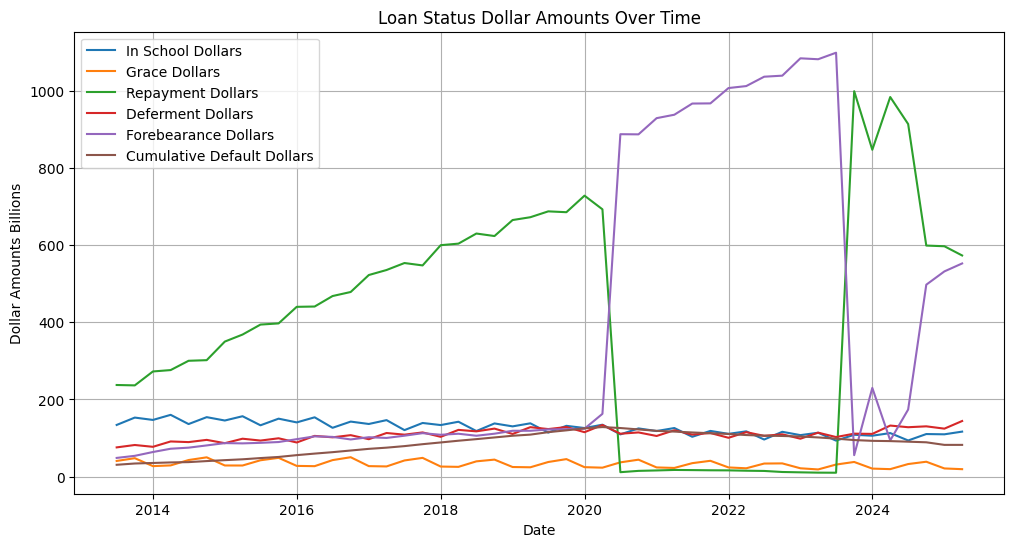

In [330]:
import matplotlib.pyplot as plt

# Creating a line plot for the dollar amounts of each loan status.
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['inschool_dollars'], label='In School Dollars')
plt.plot(df['date'], df['grace_dollars'], label='Grace Dollars')
plt.plot(df['date'], df['repayment_dollars'], label='Repayment Dollars')
plt.plot(df['date'], df['deferment_dollars'], label='Deferment Dollars')
plt.plot(df['date'], df['forebearance_dollars'], label='Forebearance Dollars')
plt.plot(df['date'], df['cumulative_default_dollars'], label='Cumulative Default Dollars')
plt.title('Loan Status Dollar Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Dollar Amounts Billions')
plt.legend()
plt.grid()
plt.show()


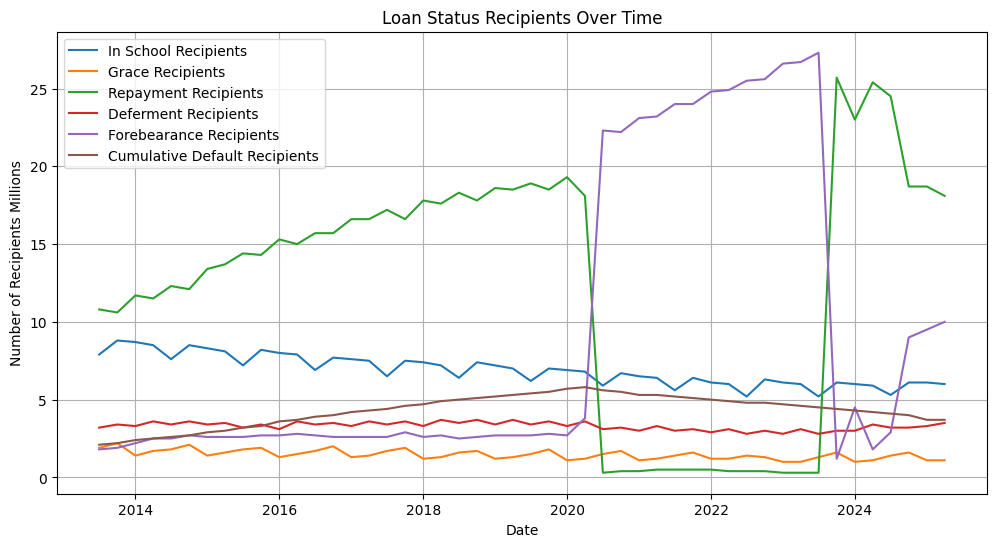

In [331]:
# Creating a line plot for the number of recipients in each loan status.
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['inschool_recipients'], label='In School Recipients')
plt.plot(df['date'], df['grace_recipients'], label='Grace Recipients')
plt.plot(df['date'], df['repayment_recipients'], label='Repayment Recipients')
plt.plot(df['date'], df['deferment_recipients'], label='Deferment Recipients')
plt.plot(df['date'], df['forebearance_recipients'], label='Forebearance Recipients')
plt.plot(df['date'], df['cumulative_default_recipients'], label='Cumulative Default Recipients')
plt.title('Loan Status Recipients Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recipients Millions')
plt.legend()
plt.grid()
plt.show()

In March 2020 due to the CARES act in response to the COVID pandemic there was an across the board forebearance for student repayment, this is reflected in our data. Interestingly we can see that the dollars and recipient amounts for in-school status loans are decreasing, while at the same time the dollars and recipients in repayment status is increasing. We can also note here that the cumulative default dollars and recipients have decreased during the CARES forebearance. 

# Data Wrangling

In [332]:
# Creating a subset of the data.

df2 = df

# 1. Modify multiple column names.
df2 = df2.rename(columns={'inschool_dollars': 'inschool_dollarsB', 'inschool_recipients': 'inschool_recipientsM', 'grace_dollars': 'grace_dollarsB', 'grace_recipients': 'grace_recipientsM', 'repayment_dollars': 'repayment_dollarsB', 'repayment_recipients': 'repayment_recipientsM', 'deferment_dollars': 'deferment_dollarsB', 'deferment_recipients': 'deferment_recipientsM', 'forebearance_dollars': 'forebearance_dollarsB', 'forebearance_recipients': 'forebearance_recipientsM', 'cumulative_default_dollars': 'cumulative_default_dollarsB', 'cumulative_default_recipients': 'cumulative_default_recipientsM'})

# Viewing new column names.
print(df2.columns)

Index(['inschool_dollarsB', 'inschool_recipientsM', 'grace_dollarsB',
       'grace_recipientsM', 'repayment_dollarsB', 'repayment_recipientsM',
       'deferment_dollarsB', 'deferment_recipientsM', 'forebearance_dollarsB',
       'forebearance_recipientsM', 'cumulative_default_dollarsB',
       'cumulative_default_recipientsM', 'month', 'date'],
      dtype='object')


In [333]:
# 2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
df2.info()

# All columns are numeric types except for date, which is correct. Variable data types were corrected above in the data cleaning.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 5 to 52
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   inschool_dollarsB               48 non-null     float64       
 1   inschool_recipientsM            48 non-null     float64       
 2   grace_dollarsB                  48 non-null     float64       
 3   grace_recipientsM               48 non-null     float64       
 4   repayment_dollarsB              48 non-null     float64       
 5   repayment_recipientsM           48 non-null     float64       
 6   deferment_dollarsB              48 non-null     float64       
 7   deferment_recipientsM           48 non-null     float64       
 8   forebearance_dollarsB           48 non-null     float64       
 9   forebearance_recipientsM        48 non-null     float64       
 10  cumulative_default_dollarsB     48 non-null     float64       
 11  cumulati

In [334]:
# 3. Fix Missing and invalid values in data.

# Check for missing values in the data.
print(df2.isnull().sum())

# There are no missing values in the data


inschool_dollarsB                 0
inschool_recipientsM              0
grace_dollarsB                    0
grace_recipientsM                 0
repayment_dollarsB                0
repayment_recipientsM             0
deferment_dollarsB                0
deferment_recipientsM             0
forebearance_dollarsB             0
forebearance_recipientsM          0
cumulative_default_dollarsB       0
cumulative_default_recipientsM    0
month                             0
date                              0
dtype: int64


In [335]:
# 4. Create new columns based on existing columns or calculations.

# Creating column to show dollar outstanding by recipients.
df2['dollars_per_recipientThousands'] = df2['inschool_dollarsB'] / df2['inschool_recipientsM']

# Creating column to show percentage of recipients in default.
df2['default_percentage'] = (df2['cumulative_default_recipientsM'] / df2['inschool_recipientsM']) * 100

# Creating total dollars column in all loan statuses.
df2['total_dollars'] = df2['inschool_dollarsB'] + df2['grace_dollarsB'] + df2['repayment_dollarsB'] + df2['deferment_dollarsB'] + df2['forebearance_dollarsB'] + df2['cumulative_default_dollarsB']

print(df2)

    inschool_dollarsB  inschool_recipientsM  grace_dollarsB  \
5               133.8                   7.9            40.4   
6               152.9                   8.8            47.6   
7               146.8                   8.7            27.0   
8               160.0                   8.5            28.9   
9               136.1                   7.6            42.8   
10              154.0                   8.5            49.8   
11              145.3                   8.3            28.7   
12              156.4                   8.1            28.6   
13              132.9                   7.2            42.2   
14              150.1                   8.2            48.5   
15              140.4                   8.0            27.6   
16              153.6                   7.9            26.9   
17              126.4                   6.9            42.6   
18              142.5                   7.7            50.1   
19              136.3                   7.6            

In [336]:
# 5. Drop column(s) from your dataset.
# Dropping columns to focus on the interplay between in-school, repayment, and defaulted loans.

df2 = df2.drop(columns=['grace_dollarsB','grace_recipientsM','deferment_dollarsB', 'deferment_recipientsM', 'forebearance_dollarsB', 'forebearance_recipientsM'])
print(df2.head())

   inschool_dollarsB  inschool_recipientsM  repayment_dollarsB  \
5              133.8                   7.9               237.4   
6              152.9                   8.8               236.4   
7              146.8                   8.7               272.5   
8              160.0                   8.5               276.1   
9              136.1                   7.6               300.2   

   repayment_recipientsM  cumulative_default_dollarsB  \
5                   10.8                         30.5   
6                   10.6                         33.8   
7                   11.7                         35.2   
8                   11.5                         36.6   
9                   12.3                         37.4   

   cumulative_default_recipientsM  month       date  \
5                             2.1      7 2013-07-01   
6                             2.2     10 2013-10-01   
7                             2.4      1 2014-01-01   
8                             2.5      4

In [337]:
# 6. Drop rows from your dataset.
# Dropping rows to focus on data from 2018 onwards.

df2 = df2[df2['date'] >= '2018-01-01']
print(df2.head())

    inschool_dollarsB  inschool_recipientsM  repayment_dollarsB  \
23              133.5                   7.4               600.0   
24              142.1                   7.2               604.0   
25              118.0                   6.4               630.2   
26              137.7                   7.4               623.7   
27              130.1                   7.2               665.2   

    repayment_recipientsM  cumulative_default_dollarsB  \
23                   17.8                         88.4   
24                   17.6                         92.9   
25                   18.3                         97.0   
26                   17.8                        101.4   
27                   18.6                        105.8   

    cumulative_default_recipientsM  month       date  \
23                             4.7      1 2018-01-01   
24                             4.9      4 2018-04-01   
25                             5.0      7 2018-07-01   
26                      

In [338]:
# 7. Sort your data based on multiple variables.
# Sorting data by inschool_recipientsM and inschool_dollarsB in descending order.

df2 = df2.sort_values(by=['inschool_recipientsM', 'inschool_dollarsB'], ascending=False)
print(df2.head())

    inschool_dollarsB  inschool_recipientsM  repayment_dollarsB  \
26              137.7                   7.4               623.7   
23              133.5                   7.4               600.0   
24              142.1                   7.2               604.0   
27              130.1                   7.2               665.2   
28              138.0                   7.0               672.5   

    repayment_recipientsM  cumulative_default_dollarsB  \
26                   17.8                        101.4   
23                   17.8                         88.4   
24                   17.6                         92.9   
27                   18.6                        105.8   
28                   18.5                        108.7   

    cumulative_default_recipientsM  month       date  \
26                             5.1     10 2018-10-01   
23                             4.7      1 2018-01-01   
24                             4.9      4 2018-04-01   
27                      

In [339]:
# 8. Filter your data based on a condition.
# Filtering data for years where the number of cumulative default recipients is greater than 4 million.

df2 = df2[df2['cumulative_default_recipientsM'] > 4]
print(df2.head())

    inschool_dollarsB  inschool_recipientsM  repayment_dollarsB  \
26              137.7                   7.4               623.7   
23              133.5                   7.4               600.0   
24              142.1                   7.2               604.0   
27              130.1                   7.2               665.2   
28              138.0                   7.0               672.5   

    repayment_recipientsM  cumulative_default_dollarsB  \
26                   17.8                        101.4   
23                   17.8                         88.4   
24                   17.6                         92.9   
27                   18.6                        105.8   
28                   18.5                        108.7   

    cumulative_default_recipientsM  month       date  \
26                             5.1     10 2018-10-01   
23                             4.7      1 2018-01-01   
24                             4.9      4 2018-04-01   
27                      

In [340]:
# 9. Convert all the string values to upper or lower cases in one column.
# There are no string values in the data. 

# this step would be completed with the following code if there were string values in the data.
# df2['column_name'] = df2['column_name'].str.upper() 
# or .str.lower()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 26 to 45
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   inschool_dollarsB               27 non-null     float64       
 1   inschool_recipientsM            27 non-null     float64       
 2   repayment_dollarsB              27 non-null     float64       
 3   repayment_recipientsM           27 non-null     float64       
 4   cumulative_default_dollarsB     27 non-null     float64       
 5   cumulative_default_recipientsM  27 non-null     float64       
 6   month                           27 non-null     int64         
 7   date                            27 non-null     datetime64[ns]
 8   dollars_per_recipientThousands  27 non-null     float64       
 9   default_percentage              27 non-null     float64       
 10  total_dollars                   27 non-null     float64       
dtypes: datetime6

In [341]:
# 10. Check whether numeric values are present in a given column of your dataframe.
# Checking if numeric values are present in the 'inschool_dollarsB' column.

print(df2['inschool_dollarsB'].dtypes)

# If the column is numeric, float or int type, it will return True. If the column has mixed types, it will return False. The data type as seen above would show as an object if there are multiple types in the column.

float64


In [342]:
# 11. Group your dataset by one column, and get the mean, min and max values by group.
# Grouping by quarter and getting mean, min, and max values for each quarter inschool_dollarsB.

df2['Quarter'] = df2['date'].dt.to_period('Q').dt.strftime('Q%q')
quarterly_stats = df2.groupby('Quarter')['inschool_dollarsB'].agg(['mean', 'min', 'max'])

print(quarterly_stats)

# Q2 has the greatest mean as expected as it reflects the beginning of the school year. Q4 has the lowest mean as expected as it reflects the end of the school year. 

               mean    min    max
Quarter                          
Q1       118.771429  105.9  133.5
Q2       126.257143  112.7  142.1
Q3       103.857143   93.1  118.0
Q4       122.766667  108.3  137.7


In [354]:
# 12. Group your dataset by two columns, and then sort the aggregated results within the groups.

# Creating column to show if the quarter is in the upper half or lower half of the recorded dollars per recipient.
df2['high_dollarsper_recipient'] = df2['dollars_per_recipientThousands'] > df2['dollars_per_recipientThousands'].median()

# creating column to show if the quarter is in the upper half or lower half of the default percentage.
df2['high_default_percentage'] = df2['default_percentage'] > df2['default_percentage'].median()

# Grouping by high_dollarsper_recipient and high_default_percentage, and sorting the mean, min, and max values for each group.
grouped_stats = df2.groupby(['high_dollarsper_recipient', 'high_default_percentage'])['cumulative_default_dollarsB'].agg(['mean', 'min', 'max']).reset_index()

print(grouped_stats)


   high_dollarsper_recipient  high_default_percentage        mean    min  \
0                      False                    False   97.237500   88.4   
1                      False                     True  113.616667   98.3   
2                       True                    False  102.683333   91.9   
3                       True                     True  116.971429  106.0   

     max  
0  105.8  
1  125.0  
2  119.8  
3  128.3  


# Conclusion

In summary what I noticed in this dataset is that although the number of recipients and dollars of direct loans in in-school status is steadily decreasing over the 10 + year time period, the amount of dollars in repayment status is steadily increasing. This signals to me that there could be a multitide of things occuring under the surface. For an unknown reason to us in this data, student loans are not being paid down in a manner in-line with the speed at which they are being loaned out. This is something that I would explore futher given more time and possibly other datasets to pair with this one. A time series forecast of pre-2020 would be very interesting to see the impact of the CARES act, and how the trejectory of default percentage and/or repayment dollars has changed in response. I do note here that during the CARES act forebearance, the cumulative deafult dollars and recipients does change course and decrease - although no conclusions can be made from this alone. A subject matter expert would need to clarify if borrowers continued to pay their loans down even in forebearance, or if these deafults are removed after a certain set amount of time. Another interesting note is that with the groupings is that when our high_dollarsper_recipient variable was true we saw an increase in the mean cumulative deafult dollar amounts.  